In [ ]:
Taking government securities from a Uganda from the Bank of Uganda website which is the central bank to fit a Nelson-Siegel model.
The maturities selected range from short-term to long-term (e.g. 6 months
maturity to 20 year maturities) as at 31/03/2025

In [ ]:
pip install nbformat nbconvert

In [ ]:
pip install papermill

In [8]:
import numpy as np
# Maturities in years
maturities = np.array([0.5, 1, 2, 3, 5, 10, 15, 20,])

# Yields corresponding to those maturities (in %)
yields = np.array([12.5, 14.6, 15.2, 16.0, 16.1, 16.9, 17.1, 17.3])


In [10]:
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    """Nelson-Siegel yield curve function"""
    term1 = (1 - np.exp(-lambd * tau)) / (lambd * tau)
    term2 = term1 - np.exp(-lambd * tau)
    return beta0 + beta1 * term1 + beta2 * term2


In [11]:
from scipy.optimize import curve_fit

# Initial guess for parameters: [beta0, beta1, beta2, lambda]
initial_guess = [17.3, -5.0, 3.0, 0.5]

# Fit the curve
params, covariance = curve_fit(nelson_siegel, maturities, yields, p0=initial_guess)

# Extract fitted parameters
beta0, beta1, beta2, lambd = params
print(f"Fitted parameters:\n beta0={beta0:.4f}, beta1={beta1:.4f}, beta2={beta2:.4f}, lambda={lambd:.4f}")


Fitted parameters:
 beta0=17.2096, beta1=-7.3847, beta2=0.0001, lambda=2.1120


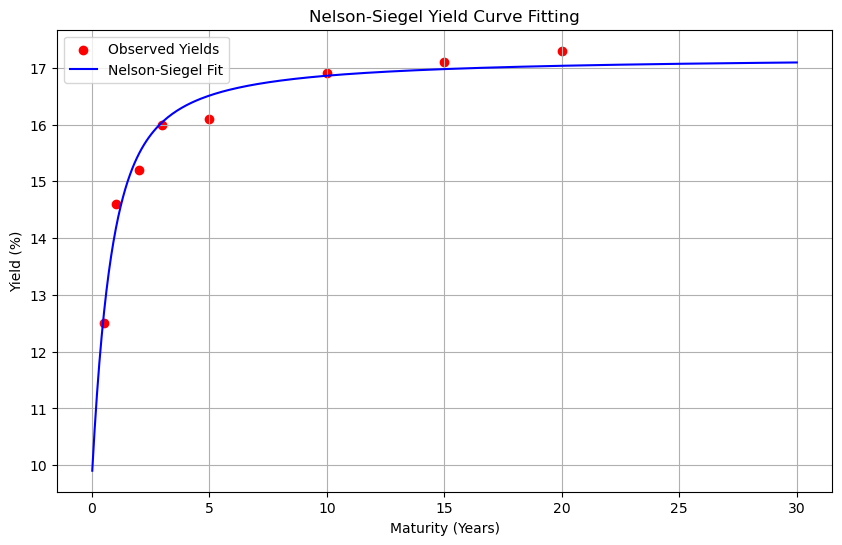

In [12]:
import matplotlib.pyplot as plt

# Generate smooth curve for plotting
tau_fine = np.linspace(0.01, 30, 300)
fitted_yields = nelson_siegel(tau_fine, beta0, beta1, beta2, lambd)

plt.figure(figsize=(10,6))
plt.scatter(maturities, yields, color='red', label='Observed Yields')
plt.plot(tau_fine, fitted_yields, label='Nelson-Siegel Fit', color='blue')
plt.title('Nelson-Siegel Yield Curve Fitting')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


In [14]:
cs = CubicSpline(maturities, yields)


In [15]:
maturities_fine = np.linspace(0.5, 20, 100)  # create smooth points
yields_fitted = cs(maturities_fine)


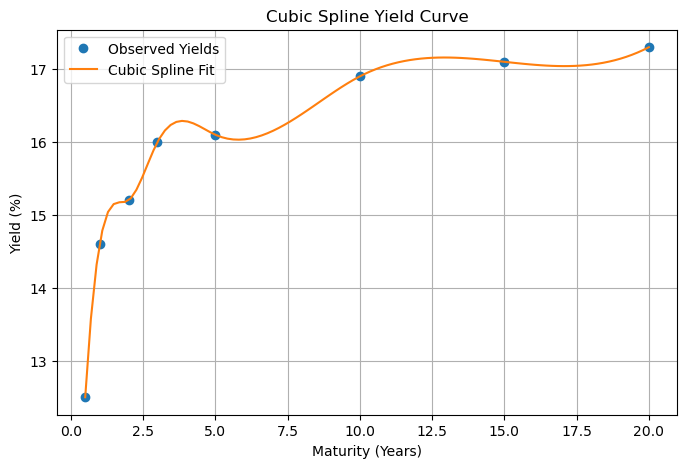

In [16]:
plt.figure(figsize=(8,5))
plt.plot(maturities, yields, 'o', label='Observed Yields') # observed points
plt.plot(maturities_fine, yields_fitted, label='Cubic Spline Fit') # smooth curve
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Cubic Spline Yield Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Nelson-Siegel Model:

Good fit for general trends.
The model provides a smooth approximation of the yield curve.

It fits the data reasonably well for upward-sloping curves like this.

However, it may not capture sharp changes or irregularities in the data as well as more flexible models (like Nelson-Siegel-Svensson).

Parameters (β₀, β₁, β₂, λ) have clear economic meaning (level, slope, curvature).

Smoothing is ethical because it clarifies data, not misleads.

Cubic Spline Model:

Very flexible, fits data closely.
The model can match the data closely at each maturity.

Parameters (α₁, α₂, etc.) have no economic meaning — purely mathematical.

Ethical if not hiding important information.

In [ ]:
Nelson-Siegel smoothing the yield curve is ethical because it simplifies and explains the yield curve without deception.

Ethical smoothing clarifies trends and removes noise.

It only becomes unethical if smoothing intentionally hides important information or misleads users.

In finance, yield curves are often smoothed to improve understanding — which is acceptable and standard practice.

